# COMMODITY MARKET INDICATOR

INSERT LIBRARY

In [24]:
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

 IMPORT DATA

In [25]:
df = pd.read_excel(r'C:\Users\RADHA.K\Desktop\commodity data\Gold Futures Historical Data.xlsx')

REVERSE THE DATA 

In [26]:
df = df.iloc[::-1].reset_index(drop=True)

Calculate SMA

In [28]:
df['MA50'] = df['Price'].rolling(50).mean()
df['MA200'] = df['Price'].rolling(200).mean()

Ploting Figure

<IPython.core.display.Javascript object>


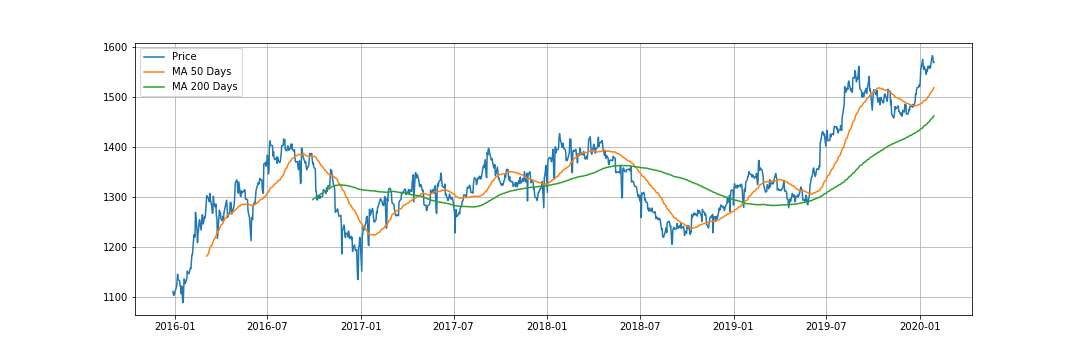

In [29]:
plt.figure(figsize=[15,5])
plt.grid(True)
plt.plot(df['Date'], df['Price'],label='Price')
plt.plot(df['Date'], df['MA50'],label='MA 50 Days')
plt.plot(df['Date'], df['MA200'],label='MA 200 Days')
plt.legend(loc=2)


Calculate Maxhigh and Minimum High year wise

In [30]:
df['maxhigh'] = df['High'].rolling(window=252, min_periods=1).max()
df['minlow'] = df['Low'].rolling(window=252, min_periods=1).min()


Ploting Figure

<IPython.core.display.Javascript object>


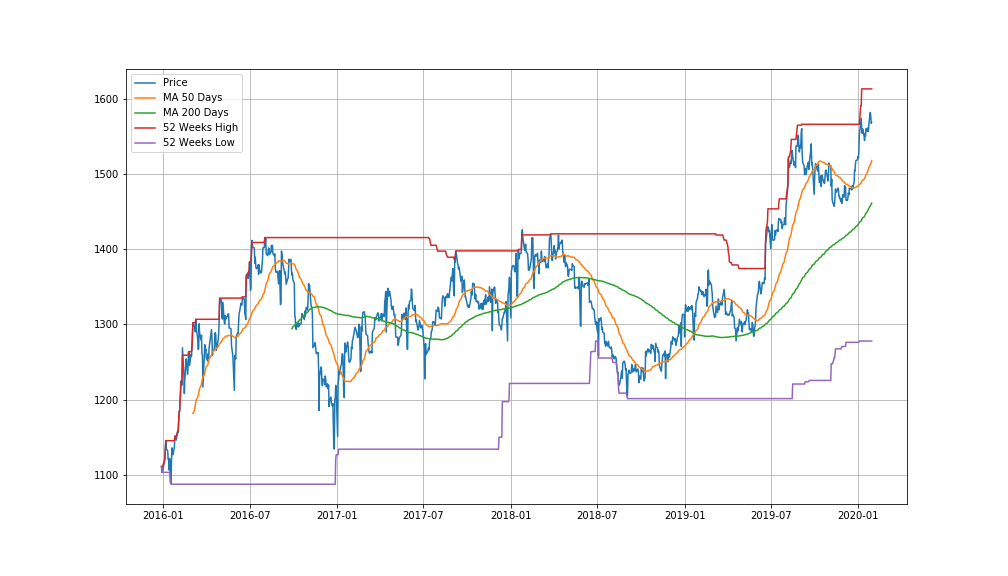

In [32]:
plt.figure(figsize=[14,8])
plt.grid(True)
plt.plot(df['Date'], df['Price'],label='Price')
plt.plot(df['Date'], df['MA50'],label='MA 50 Days')
plt.plot(df['Date'], df['MA200'],label='MA 200 Days')
plt.plot(df['Date'], df['maxhigh'],label='52 Weeks High')
plt.plot(df['Date'], df['minlow'],label='52 Weeks Low')
plt.legend(loc=2)

Bolinger Band

In [34]:
df['MA20'] = df['Price'].rolling(20).mean()
df['20 Day STD'] = df['Price'].rolling(window=20).std()
df['Upper Band'] = df['MA20'] + (df['20 Day STD'] * 2)
df['Lower Band'] = df['MA20'] - (df['20 Day STD'] * 2)


<IPython.core.display.Javascript object>


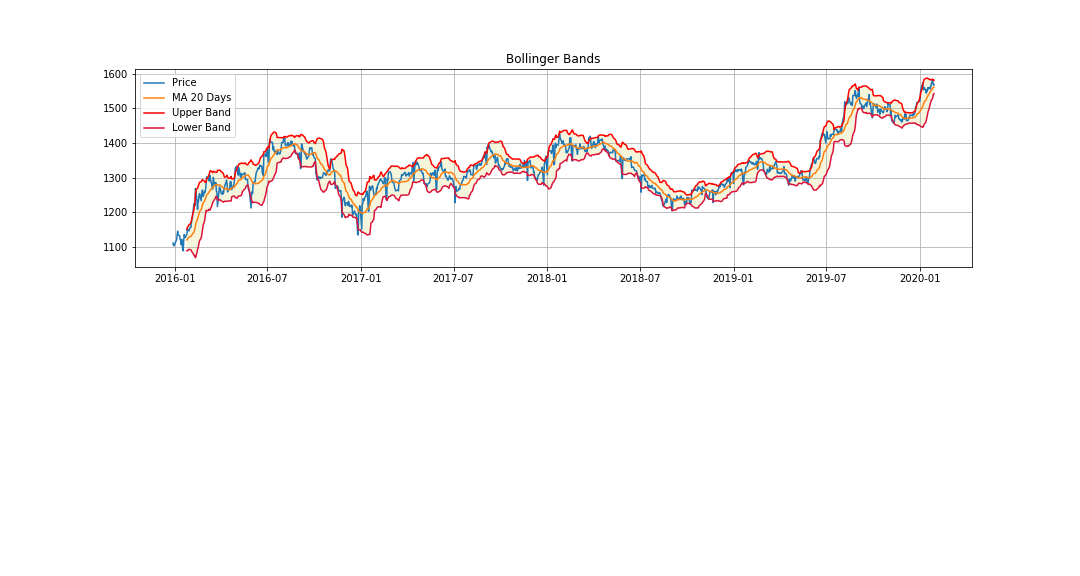

In [35]:
plt.figure(figsize=[15,8])
plt.grid(True)

plt.subplot(2, 1, 1)

plt.plot(df['Date'], df['Price'],label='Price')
plt.plot(df['Date'], df['MA20'],label='MA 20 Days')
plt.plot(df['Date'], df['Upper Band'],label='Upper Band', color = "red")
plt.plot(df['Date'], df['Lower Band'],label='Lower Band', color = "crimson")
plt.legend(loc=2)
plt.grid(True)
plt.title('Bollinger Bands')

d = df['Date'].values
plt.fill_between(d, df['Upper Band'], df['Lower Band'], facecolor='beige')

#plt.subplot(2, 1, 2)
#plt.bar(df['Date'], df['Vol.'])
#plt.title('Volume')